In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

# Export df
df_final_demo = pd.read_csv('df_final_demo.txt')
df_final_experiment_clients = pd.read_csv('df_final_experiment_clients.txt')
df_final_web_data_pt_1 = pd.read_csv('df_final_web_data_pt_1.txt')
df_final_web_data_pt_2 = pd.read_csv('df_final_web_data_pt_2.txt')

In [3]:
df_final_demo.sort_values(by='client_id').head(3)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
59771,169,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0
40126,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0
1532,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0


In [4]:
df_final_experiment_clients.sort_values(by='client_id').head(3)

,client_id,Variation
58722,169,NaN
14753,555,Test
28357,647,Test


In [5]:
df_final_web_data_pt_1.sort_values(by='client_id').head(3)

,client_id,visitor_id,visit_id,process_step,date_time
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05
285511,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09


In [6]:
df_final_web_data_pt_2.sort_values(by='client_id').head(3)

,client_id,visitor_id,visit_id,process_step,date_time
285190,336,64757908_3400128256,649044751_80905125055_554468,start,2017-06-01 07:42:43
285315,336,64757908_3400128256,649044751_80905125055_554468,start,2017-06-01 07:26:55
99715,546,475037402_89828530214,731811517_9330176838_94847,step_1,2017-06-17 10:03:39


In [7]:
df_concat_web_data = pd.concat([df_final_web_data_pt_1, df_final_web_data_pt_2], ignore_index=True)
df_concat_web_data.sort_values(by='client_id', inplace=True)
df_concat_web_data

,client_id,visitor_id,visit_id,process_step,date_time
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05
285511,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31
285514,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45
285515,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36
...,...,...,...,...,...
648533,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:40:08
648529,9999875,738878760_1556639849,931268933_219402947_599432,confirm,2017-06-01 22:48:39
648530,9999875,738878760_1556639849,931268933_219402947_599432,step_3,2017-06-01 22:44:58
648532,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:41:28


In [8]:
df_merged = pd.merge(df_final_demo, df_final_experiment_clients, on='client_id', how='inner')
df_merged

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [9]:
df_final = pd.merge(df_merged, df_concat_web_data, on='client_id', how='inner')

df_final.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,start,2017-04-02 11:21:28
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:02:44
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:01:40


In [10]:
# Filtrar por los clientes que han hecho "test" o "control"
df_final_filtered = df_final[df_final['Variation'].notna()]
df_final_filtered.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,start,2017-04-02 11:21:28
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:02:44
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:01:40


In [11]:
df_final_filtered['gendr'].unique()

array(['U', 'M', 'F', nan, 'X'], dtype=object)

In [12]:
df_final_filtered['gendr'].value_counts()

gendr
U    108884
M    108013
F    104302
X         8
Name: count, dtype: int64

In [13]:
df_final_filtered.isna().sum()

client_id             0
clnt_tenure_yr      102
clnt_tenure_mnth    102
clnt_age            114
gendr               102
num_accts           102
bal                 102
calls_6_mnth        102
logons_6_mnth       102
Variation             0
visitor_id            0
visit_id              0
process_step          0
date_time             0
dtype: int64

In [14]:
df_final_filtered = df_final_filtered.dropna()
df_final_filtered.isna().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
Variation           0
visitor_id          0
visit_id            0
process_step        0
date_time           0
dtype: int64

In [15]:
# Convert float to int
df_final_filtered['logons_6_mnth'] = df_final_filtered['logons_6_mnth'].astype(int)

In [16]:
df_final_filtered['gendr'] = df_final_filtered['gendr'].replace(['X'], ['U'])
df_final_filtered['gendr'].value_counts()

gendr
U    108892
M    108013
F    104290
Name: count, dtype: int64

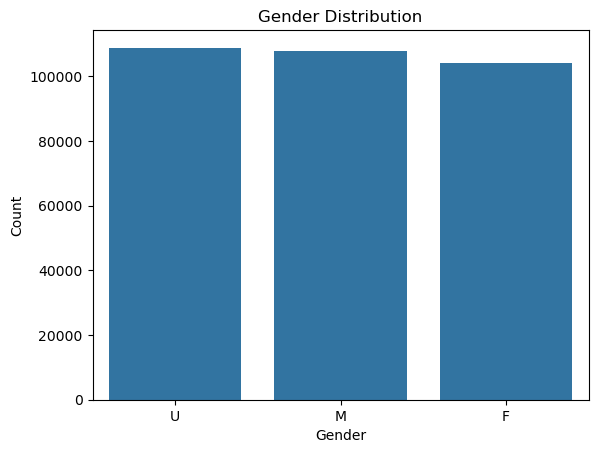

In [17]:
# Gender distribution
sns.countplot(x='gendr', data=df_final_filtered)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [18]:
df_final_filtered['Variation'].unique()

array(['Test', 'Control'], dtype=object)

In [19]:
df_final_filtered['process_step'].value_counts()

process_step
start      104041
step_1      68410
step_2      56855
step_3      48675
confirm     43214
Name: count, dtype: int64

C:\Users\eslab\AppData\Local\Temp\ipykernel_9316\2658395255.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final_filtered, x='process_step', palette="Set3");


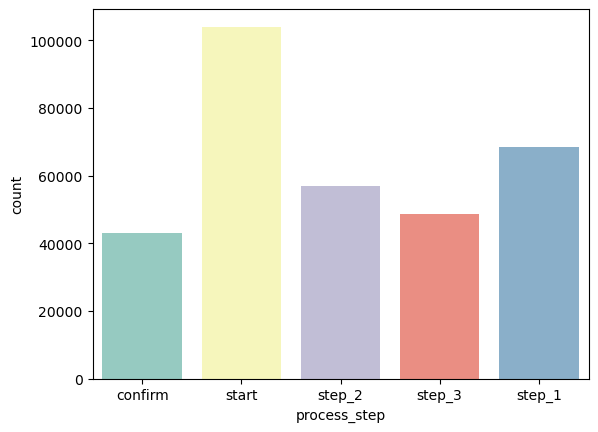

In [20]:
# Plotting a count plot for the 'MSZoning' column from the dataframe 'df', using the "Set3" palette for coloring
sns.countplot(data=df_final_filtered, x='process_step', palette="Set3");

C:\Users\eslab\AppData\Local\Temp\ipykernel_9316\1339763098.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final_filtered, x='Variation', palette="Set3");


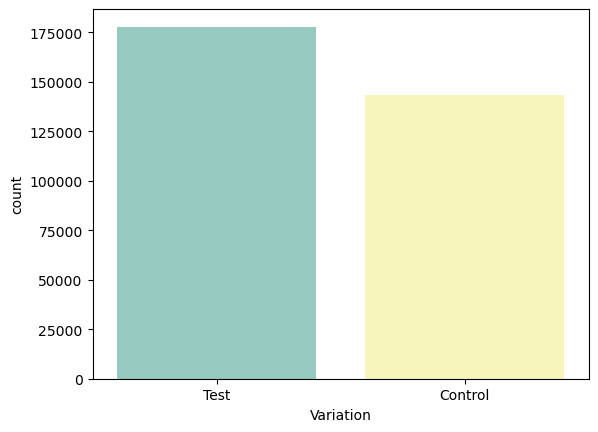

In [21]:
sns.countplot(data=df_final_filtered, x='Variation', palette="Set3");

## Numerical Variables


In [22]:
df_final_filtered.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,3.211950e+05,321195.000000,321195.000000,321195.000000,321195.000000,3.211950e+05,321195.000000,321195.000000
mean,5.009766e+06,12.176528,152.134818,48.553511,2.262962,1.622142e+05,3.236834,6.275082
std,2.872653e+06,6.963181,83.210462,15.645588,0.541536,3.494776e+05,2.193690,2.179757
min,5.550000e+02,2.000000,33.000000,17.000000,1.000000,2.378944e+04,0.000000,3.000000
25%,2.514553e+06,6.000000,82.000000,34.500000,2.000000,4.105887e+04,1.000000,4.000000
50%,5.051667e+06,11.000000,138.000000,50.000000,2.000000,6.924195e+04,3.000000,6.000000
75%,7.468390e+06,16.000000,193.000000,61.000000,2.000000,1.514930e+05,6.000000,9.000000
max,9.999832e+06,55.000000,669.000000,96.000000,7.000000,1.632004e+07,6.000000,9.000000


In [23]:
mean_month = df_final_filtered['clnt_tenure_mnth'].mean()
median_month = df_final_filtered['clnt_tenure_mnth'].median()
mode_month = df_final_filtered['clnt_tenure_mnth'].mode()[0]

mean_month, median_month, mode_month

(152.13481841249086, 138.0, 58.0)

In [24]:
# Measures of dispersion
variance_month = df_final_filtered['clnt_tenure_mnth'].var()
std_dev_month = df_final_filtered['clnt_tenure_mnth'].std()
min_month = df_final_filtered['clnt_tenure_mnth'].min()
max_month = df_final_filtered['clnt_tenure_mnth'].max()
range_month = max_month - min_month
quartiles_month = df_final_filtered['clnt_tenure_mnth'].quantile([0.25, 0.5, 0.75])

variance_month, std_dev_month, min_month, max_month, range_month, quartiles_month



(6923.981005119887,
 83.21046211336581,
 33.0,
 669.0,
 636.0,
 0.25     82.0
 0.50    138.0
 0.75    193.0
 Name: clnt_tenure_mnth, dtype: float64)

In [25]:
# Calculating skewness and kurtosis
skewness_month = df_final_filtered['clnt_tenure_mnth'].skew()
kurtosis_month = df_final_filtered['clnt_tenure_mnth'].kurtosis()

skewness_month, kurtosis_month

(1.0149608889921815, 0.8900514168971156)

<Axes: xlabel='clnt_tenure_mnth', ylabel='Count'>

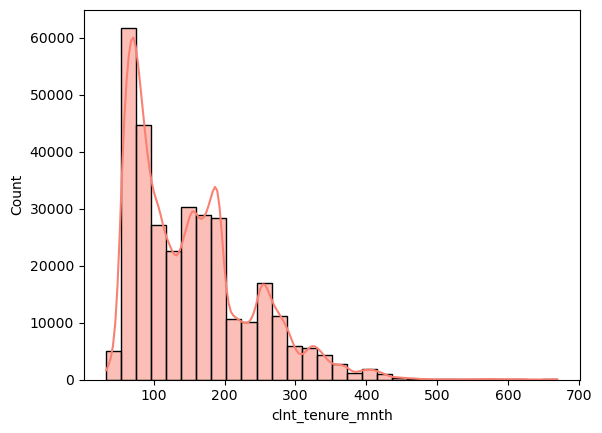

In [26]:
# Plotting a histogram for the 'SalePrice' column of the 'data' dataframe
# 'kde=True' adds a Kernel Density Estimate plot to give an approximation of the data's distribution
# 'bins=30' divides the data into 30 bins for more detailed granularity
# 'color="salmon"' sets the color of the bars to salmon
sns.histplot(df_final_filtered['clnt_tenure_mnth'], kde=True, bins=30, color="salmon")

In [27]:
mean_age = df_final_filtered['clnt_age'].mean()
median_age = df_final_filtered['clnt_age'].median()
mode_age = df_final_filtered['clnt_age'].mode()[0]

mean_age, median_age, mode_age

(48.553511106959945, 50.0, 58.5)

In [28]:
variance_age = df_final_filtered['clnt_age'].var()
std_dev_age = df_final_filtered['clnt_age'].std()
min_age = df_final_filtered['clnt_age'].min()
max_age = df_final_filtered['clnt_age'].max()
range_age = max_age - min_age
quartiles_age = df_final_filtered['clnt_age'].quantile([0.25, 0.5, 0.75])

variance_age, std_dev_age, min_age, max_age, range_age, quartiles_age

(244.78442943468343,
 15.64558817797156,
 17.0,
 96.0,
 79.0,
 0.25    34.5
 0.50    50.0
 0.75    61.0
 Name: clnt_age, dtype: float64)

In [29]:
skewness_age = df_final_filtered['clnt_age'].skew()
kurtosis_age = df_final_filtered['clnt_age'].kurtosis()

skewness_age, kurtosis_age

(-0.012801806342837261, -0.9346229222661635)

<Axes: xlabel='clnt_age', ylabel='Count'>

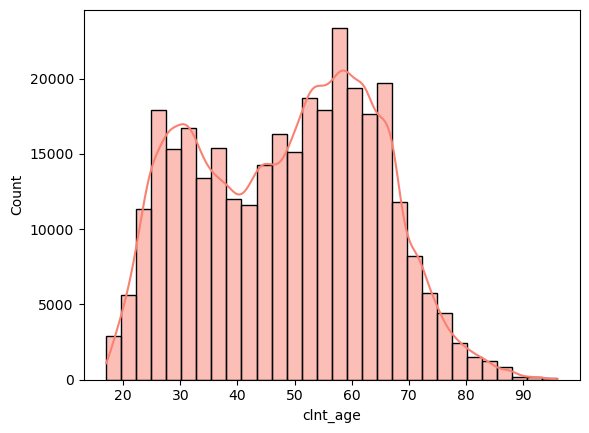

In [30]:
# Plotting a histogram for the 'SalePrice' column of the 'data' dataframe
# 'kde=True' adds a Kernel Density Estimate plot to give an approximation of the data's distribution
# 'bins=30' divides the data into 30 bins for more detailed granularity
# 'color="salmon"' sets the color of the bars to salmon
sns.histplot(df_final_filtered['clnt_age'], kde=True, bins=30, color="salmon")

In [31]:
mean_logons_6_mnth = df_final_filtered['logons_6_mnth'].mean()
median_logons_6_mnth = df_final_filtered['logons_6_mnth'].median()
mode_logons_6_mnth = df_final_filtered['logons_6_mnth'].mode()[0]

mean_logons_6_mnth, median_logons_6_mnth, mode_logons_6_mnth

(6.2750821152259535, 6.0, 9)

In [32]:
variance_logons_6_mnth = df_final_filtered['logons_6_mnth'].var()
std_dev_logons_6_mnth = df_final_filtered['logons_6_mnth'].std()
min_logons_6_mnth = df_final_filtered['logons_6_mnth'].min()
max_logons_6_mnth = df_final_filtered['logons_6_mnth'].max()
range_logons_6_mnth = max_logons_6_mnth - min_logons_6_mnth
quartiles_logons_6_mnth = df_final_filtered['logons_6_mnth'].quantile([0.25, 0.5, 0.75])

variance_logons_6_mnth, std_dev_logons_6_mnth, min_logons_6_mnth, max_logons_6_mnth, range_logons_6_mnth, quartiles_logons_6_mnth

(4.751340684158165,
 2.179757024110294,
 3,
 9,
 6,
 0.25    4.0
 0.50    6.0
 0.75    9.0
 Name: logons_6_mnth, dtype: float64)

In [33]:
skewness_logons_6_mnth = df_final_filtered['logons_6_mnth'].skew()
kurtosis_logons_6_mnth = df_final_filtered['logons_6_mnth'].kurtosis()

skewness_logons_6_mnth, kurtosis_logons_6_mnth

(-0.06516227623765022, -1.4394495068728925)

In [34]:
df_final_filtered.clnt_age.value_counts()

clnt_age
58.5    4630
62.5    4563
59.5    4546
57.5    4422
52.5    4362
        ... 
17.0      19
89.5      17
96.0      10
95.5       6
94.5       5
Name: count, Length: 158, dtype: int64

In [35]:
# Define bins and labels for 4 categories
bins = [0, 30, 40, 50, df_final_filtered['clnt_age'].max()]  # Add another bin for 30-40 age group
labels = ['Young (0-30)', 'Young Adults (31-40)', 'Middle-aged (41-50)', 'Senior (51+)']

# Discretize 'clnt_age' into 4 categories
df_final_filtered['clnt_age_category'] = pd.cut(df_final_filtered['clnt_age'], bins=bins, labels=labels, include_lowest=True)

# Display value counts to check the distribution of clients across age categories
df_final_filtered['clnt_age_category'].value_counts()

clnt_age_category
Senior (51+)            159773
Young Adults (31-40)     54840
Middle-aged (41-50)      53516
Young (0-30)             53066
Name: count, dtype: int64

<Axes: xlabel='logons_6_mnth', ylabel='Count'>

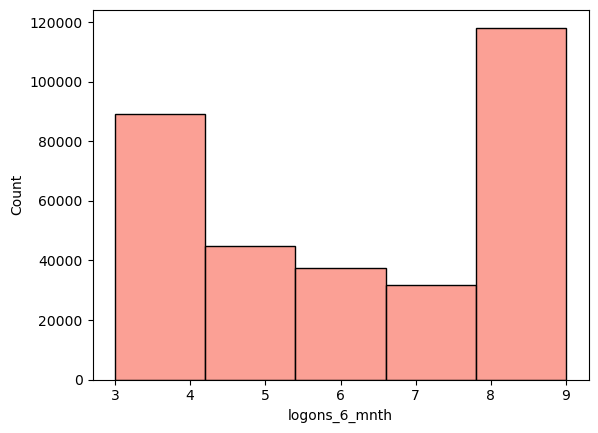

In [36]:
# Plotting a histogram for the 'SalePrice' column of the 'data' dataframe
# 'kde=True' adds a Kernel Density Estimate plot to give an approximation of the data's distribution
# 'bins=30' divides the data into 30 bins for more detailed granularity
# 'color="salmon"' sets the color of the bars to salmon
sns.histplot(df_final_filtered['logons_6_mnth'], bins = 5, color="salmon")

In [37]:
df_final_filtered.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time,clnt_age_category
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45,Senior (51+)
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9,Test,427070339_1413275162,228976764_46825473280_96584,start,2017-04-02 11:21:28,Senior (51+)
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:02:44,Senior (51+)
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24,Senior (51+)
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:01:40,Senior (51+)


In [38]:
crosstab_age_steps = pd.crosstab(df_final_filtered['clnt_age_category'], df_final_filtered['process_step'])
print(crosstab_age_steps)


process_step          confirm  start  step_1  step_2  step_3
clnt_age_category                                           
Young (0-30)             7357  16566   11377    9626    8140
Young Adults (31-40)     7778  17418   11567    9734    8343
Middle-aged (41-50)      7384  17150   11352    9551    8079
Senior (51+)            20695  52907   34114   27944   24113


In [39]:
chi2, p, dof, expected = chi2_contingency(crosstab_age_steps)

print(f'Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}')

Chi2: 134.1768809417242, p-value: 8.933267540103155e-23, Degrees of Freedom: 12


p-value = 8.933267540103155e-23 means that there is a statistically significant association between the two categorical variables

In [40]:
# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_age_steps, method="cramer")

0.011800321250993931

<Axes: xlabel='clnt_age_category'>

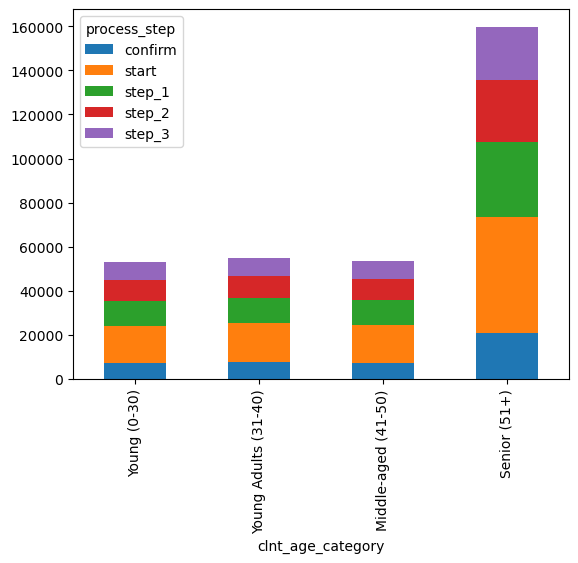

In [41]:
crosstab_age_steps.plot(kind='bar', stacked=True)

- The Senior (51+) category has significantly higher counts across all process steps compared to the other age groups. This suggests that seniors are more engaged or are progressing further through the process steps than younger clients.
- Engagement decreases as clients move through the steps. The highest is in the Start phase, with a significant drop in the final steps.

In [42]:
crosstab_gender_steps = pd.crosstab(df_final_filtered['gendr'], df_final_filtered['process_step'])
print(crosstab_gender_steps)

process_step  confirm  start  step_1  step_2  step_3
gendr                                               
F               13721  34410   22341   18195   15623
M               15002  35240   23019   18684   16068
U               14491  34391   23050   19976   16984


In [43]:
chi2, p, dof, expected = chi2_contingency(crosstab_gender_steps)

print(f'Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}')

Chi2: 121.8623174388735, p-value: 1.367267759634818e-22, Degrees of Freedom: 8


In [44]:
association(crosstab_gender_steps, method="cramer")

0.013773215115891102

<Axes: xlabel='gendr'>

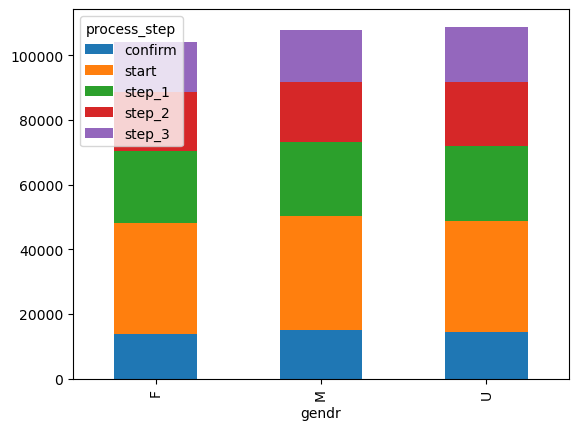

In [45]:
crosstab_gender_steps.plot(kind='bar', stacked=True)

- The highest engagement is seen in the Start phase, with a decrease in participation as the steps progress in all sex groups

In [46]:
crosstab_age_variations = pd.crosstab(df_final_filtered['clnt_age_category'], df_final_filtered['Variation'])
print(crosstab_age_variations)

Variation             Control   Test
clnt_age_category                   
Young (0-30)            24129  28937
Young Adults (31-40)    24814  30026
Middle-aged (41-50)     24356  29160
Senior (51+)            70109  89664


In [47]:
chi2, p, dof, expected = chi2_contingency(crosstab_age_variations)

print(f'Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}')

Chi2: 76.73469173818287, p-value: 1.5390840316683493e-16, Degrees of Freedom: 3


In [48]:
association(crosstab_age_variations, method='cramer')

0.01545651174974445

<Axes: xlabel='clnt_age_category'>

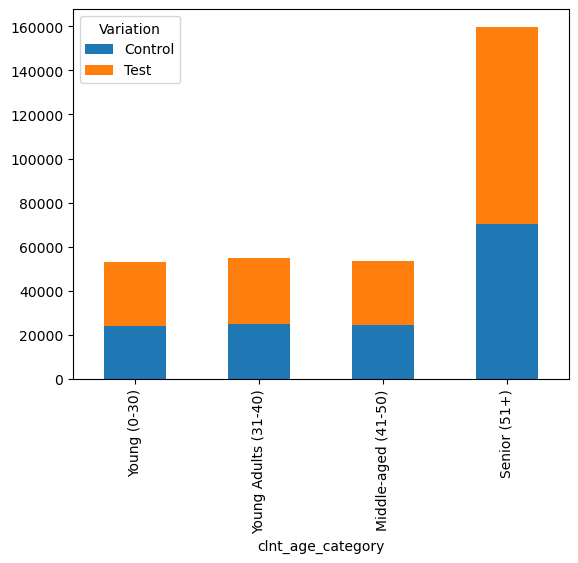

In [49]:
crosstab_age_variations.plot(kind='bar', stacked=True)

- The Test group is consistently more populated across all age categories
- This suggests that the Test variation might be more appealing or effective at engaging participants, particularly among older clients.

C:\Users\eslab\AppData\Local\Temp\ipykernel_9316\3634258375.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_final_filtered, x='clnt_age', y='process_step', palette="coolwarm")


<Axes: xlabel='clnt_age', ylabel='process_step'>

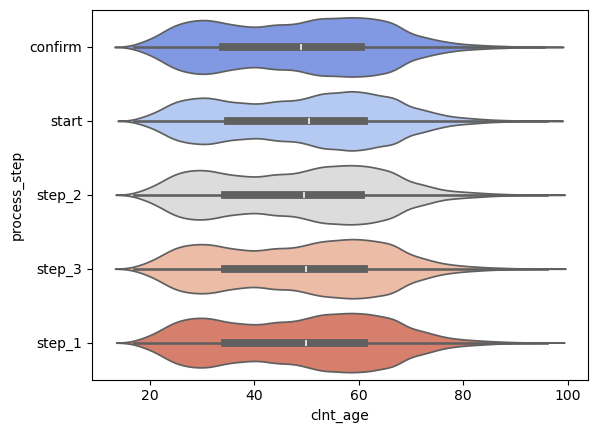

In [50]:
sns.violinplot(data=df_final_filtered, x='clnt_age', y='process_step', palette="coolwarm")

C:\Users\eslab\AppData\Local\Temp\ipykernel_9316\3070640262.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final_filtered, x='process_step', y='clnt_age', palette="coolwarm")


<Axes: xlabel='process_step', ylabel='clnt_age'>

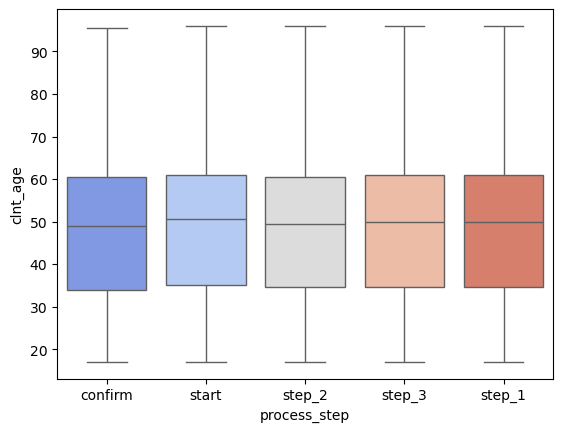

In [51]:
# Plotting a box plot to visualize the spread and outliers of 'age' for each 'process_step' category, using the "coolwarm" color palette
sns.boxplot(data=df_final_filtered, x='process_step', y='clnt_age', palette="coolwarm")

C:\Users\eslab\AppData\Local\Temp\ipykernel_9316\1640451304.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final_filtered, x='process_step', y='bal', palette="coolwarm")


<Axes: xlabel='process_step', ylabel='bal'>

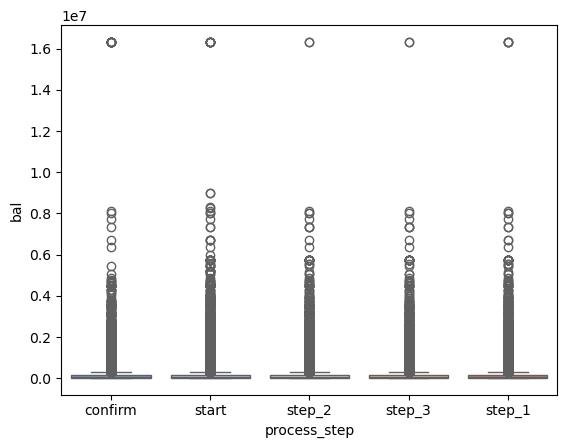

In [52]:
# Plotting a box plot to visualize the spread and outliers of 'SalePrice' for each 'MSZoning' category, using the "coolwarm" color palette
sns.boxplot(data=df_final_filtered, x='process_step', y='bal', palette="coolwarm")

In [53]:
df_final_filtered['bal'].max()

16320040.15

In [54]:
# Define bins and labels for 4 categories
bins = [0, 100000, 200000, 300000, df_final_filtered['bal'].max()]  # Add another bin for 30-40 age group
labels = ['Low', 'Medium', 'High', 'Strong']

# Discretize 'clnt_age' into 4 categories
df_final_filtered['balance'] = pd.cut(df_final_filtered['bal'], bins=bins, labels=labels, include_lowest=True)

# Display value counts to check the distribution of clients across age categories
df_final_filtered['balance'].value_counts()

balance
Low       202442
Medium     57886
Strong     39015
High       21852
Name: count, dtype: int64

In [55]:
crosstab_bal_steps = pd.crosstab(df_final_filtered['balance'], df_final_filtered['process_step'])
print(crosstab_bal_steps)

process_step  confirm  start  step_1  step_2  step_3
balance                                             
Low             26892  64351   43445   36575   31179
Medium           7756  19411   12266    9907    8546
High             2883   7398    4612    3775    3184
Strong           5683  12881    8087    6598    5766


In [56]:
chi2, p, dof, expected = chi2_contingency(crosstab_bal_steps)

print(f'Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}')

Chi2: 180.92733647281852, p-value: 2.7524558100392217e-32, Degrees of Freedom: 12


In [57]:
association(crosstab_bal_steps, method="cramer")

0.01370272933943535

<Axes: xlabel='balance'>

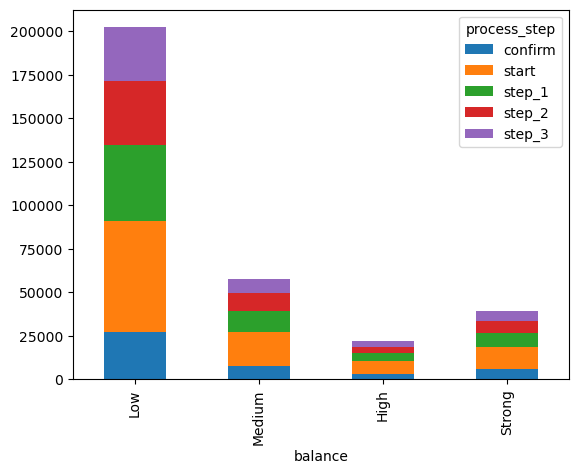

In [58]:
crosstab_bal_steps.plot(kind='bar', stacked=True)

In [59]:
df_final_filtered.head()    

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time,clnt_age_category,balance
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45,Senior (51+),Low
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9,Test,427070339_1413275162,228976764_46825473280_96584,start,2017-04-02 11:21:28,Senior (51+),Low
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:02:44,Senior (51+),Low
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24,Senior (51+),Low
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:01:40,Senior (51+),Low


In [60]:
completion_counts = df_final_filtered.groupby('Variation')['process_step'].apply(lambda x: (x == 'confirm').sum())
total_counts = df_final_filtered['Variation'].value_counts()
completion_rate = completion_counts / total_counts
print(f'Completion Rates:\n{completion_rate}')


Completion Rates:
Variation
Control    0.122016
Test       0.144645
dtype: float64


In [61]:
df_final_filtered.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time,clnt_age_category,balance
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45,Senior (51+),Low
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9,Test,427070339_1413275162,228976764_46825473280_96584,start,2017-04-02 11:21:28,Senior (51+),Low
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:02:44,Senior (51+),Low
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24,Senior (51+),Low
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:01:40,Senior (51+),Low


In [62]:
df_final_filtered['date_time'] = pd.to_datetime(df_final_filtered['date_time'])

# STEPS ANALYSIS

### CONFIRM

In [63]:
# Determine how many users reached the "confirm" step for each variation
completion_counts = df_final_filtered.groupby('Variation')['process_step'].apply(lambda x: (x == 'confirm').sum()) # Funcion to count the number of users who reached the "confirm" step 
print(f'Completion Confirm Counts:\n{completion_counts}') # Print the completion_counts


Completion Confirm Counts:
Variation
Control    17498
Test       25716
Name: process_step, dtype: int64


In [64]:
total_counts = df_final_filtered['Variation'].value_counts()
completion_rate = completion_counts / total_counts # Calculate the completion rate for each variation
print(f'Completion Rates:\n{completion_rate}')

Completion Rates:
Variation
Control    0.122016
Test       0.144645
dtype: float64


The Test variation demonstrates a better performance in terms of completion rates compared to the Control variation.

### START

In [65]:
# Determine how many users reached the "start" step for each variation
start_count = df_final_filtered.groupby('Variation')['process_step'].apply(lambda x: (x == 'start').sum()) # Funcion to count the number of users who reached the "confirm" step 
print(f'Completion Start Counts:\n{start_count}') # Print the completion_counts

Completion Start Counts:
Variation
Control    47589
Test       56452
Name: process_step, dtype: int64


In [66]:
start_rate = start_count / total_counts # Calculate the completion rate for each variation
print(f'Completion start Rates:\n{start_rate}')

Completion start Rates:
Variation
Control    0.331843
Test       0.317526
dtype: float64


The Control group has a completion start rate of 33.18%, while the Test group has a lower rate of 31.75%.
This suggests that users in the Control variation are more likely to start and complete the process compared to those in the Test variation.

### STEP 1

In [67]:
# Determine how many users reached the "step_1" for each variation
step_1_count = df_final_filtered.groupby('Variation')['process_step'].apply(lambda x: (x == 'step_1').sum()) # Funcion to count the number of users who reached the "confirm" step 
print(f'Completion step 1 Counts:\n{step_1_count}') # Print the completion_counts

Completion step 1 Counts:
Variation
Control    29657
Test       38753
Name: process_step, dtype: int64


In [68]:
step_1_count = step_1_count / total_counts # Calculate the completion rate for each variation
print(f'Completion step 1 Rates:\n{step_1_count}')

Completion step 1 Rates:
Variation
Control    0.206802
Test       0.217974
dtype: float64


The Test variation shows a higher completion step 1 rate compared to the Control variation, suggesting that the changes made in the Test may enhance user engagement and success at this initial stage.

### STEP 2

In [69]:
step_2_count = df_final_filtered.groupby('Variation')['process_step'].apply(lambda x: (x == 'step_2').sum()) # Funcion to count the number of users who reached the "confirm" step 
print(f'Completion step 2 Counts:\n{step_2_count}') # Print the completion_counts

Completion step 2 Counts:
Variation
Control    25877
Test       30978
Name: process_step, dtype: int64


In [70]:
step_2_count = step_2_count / total_counts # Calculate the completion rate for each variation
print(f'Completion step 2 Rates:\n{step_2_count}')

Completion step 2 Rates:
Variation
Control    0.180443
Test       0.174242
dtype: float64


Indicate that users are more successful in completing this step with the Control design.

### STEP 3

In [71]:
step_3_count = df_final_filtered.groupby('Variation')['process_step'].apply(lambda x: (x == 'step_3').sum()) # Funcion to count the number of users who reached the "confirm" step 
print(f'Completion step 3 Counts:\n{step_3_count}') # Print the completion_counts

Completion step 3 Counts:
Variation
Control    22787
Test       25888
Name: process_step, dtype: int64


In [72]:
step_3_count = step_3_count / total_counts # Calculate the completion rate for each variation
print(f'Completion step 3 Rates:\n{step_3_count}')

Completion step 3 Rates:
Variation
Control    0.158896
Test       0.145612
dtype: float64


Is higher in Control

# TIME SPEND IN EACH STEP

In [73]:
# Analize the time spent in each step
df_final_filtered = df_final_filtered.sort_values(by=['visitor_id', 'date_time'])
# Calculate time spent on each step
df_final_filtered['time_spent'] = df_final_filtered.groupby('visitor_id')['date_time'].diff().dt.total_seconds().fillna(0)

# Average time spent on each step by variation
avg_time_spent = df_final_filtered.groupby(['Variation', 'process_step'])['time_spent'].mean().unstack()
print(f'Average Time Spent:\n{avg_time_spent}')

Average Time Spent:
process_step       confirm          start      step_1     step_2      step_3
Variation                                                                   
Control       47191.376900  116338.875349  865.819334  39.393477  346.487339
Test          70091.983201   91340.295756  948.056434  83.517851  555.212029


In [74]:
df_final_filtered['previous_time_spent'] = df_final_filtered.groupby('visitor_id')['time_spent'].shift(1)

# 4. Opcional: Puedes imprimir el DataFrame para ver la nueva columna
print(df_final_filtered[['visitor_id', 'process_step', 'time_spent', 'previous_time_spent']])

                   visitor_id process_step  time_spent  previous_time_spent
45124    100019786_4272121951        start         0.0                  NaN
45125    100019786_4272121951       step_1        13.0                  0.0
45126    100019786_4272121951       step_2        35.0                 13.0
45127    100019786_4272121951       step_3        89.0                 35.0
45128    100019786_4272121951      confirm        28.0                 89.0
...                       ...          ...         ...                  ...
104961  999998529_89539814462       step_2       174.0                100.0
104962  999998529_89539814462       step_3         8.0                174.0
104965  999998529_89539814462      confirm       574.0                  8.0
104967  999998529_89539814462        start       282.0                574.0
104959  999998529_89539814462       step_1        18.0                282.0

[321195 rows x 4 columns]


In [75]:
correlation = df_final_filtered[['time_spent', 'previous_time_spent']].corr().iloc[0, 1]
print(f'Correlation between current and previous time spent: {correlation}')

Correlation between current and previous time spent: 0.006558638147322237


In [76]:
# Segment analysis


# Análisis de segmentos por categoría de edad
age_segments = df_final_filtered.groupby('clnt_age_category')[['time_spent', 'previous_time_spent']].corr().iloc[0::2, -1]

# Resetear el índice para facilitar la visualización
age_segments = age_segments.reset_index()
age_segments.columns = ['clnt_age_category', 'Variable', 'Correlation']

print("Correlación entre tiempo actual y tiempo anterior por categoría de edad:")
print(age_segments)

# Análisis de segmentos por género
gender_segments = df_final_filtered.groupby('gendr')[['time_spent', 'previous_time_spent']].corr().iloc[0::2, -1]

# Resetear el índice para facilitar la visualización
gender_segments = gender_segments.reset_index()
gender_segments.columns = ['gendr', 'Variable', 'Correlation']

print("\nCorrelación entre tiempo actual y tiempo anterior por género:")
print(gender_segments)


Correlación entre tiempo actual y tiempo anterior por categoría de edad:
      clnt_age_category    Variable  Correlation
0          Young (0-30)  time_spent     0.004689
1  Young Adults (31-40)  time_spent     0.006686
2   Middle-aged (41-50)  time_spent     0.009725
3          Senior (51+)  time_spent     0.004486

Correlación entre tiempo actual y tiempo anterior por género:
  gendr    Variable  Correlation
0     F  time_spent     0.008788
1     M  time_spent     0.009611
2     U  time_spent    -0.000663


C:\Users\eslab\AppData\Local\Temp\ipykernel_9316\302314490.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_segments = df_final_filtered.groupby('clnt_age_category')[['time_spent', 'previous_time_spent']].corr().iloc[0::2, -1]


There is no significant linear relationship between the time spent in consecutive steps, which could be a valuable finding for future website optimizations.

In [77]:
df_final_filtered.head()


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time,clnt_age_category,balance,time_spent,previous_time_spent
45124,6265388,7.0,94.0,42.5,U,4.0,214896.6,5.0,8,Test,100019786_4272121951,703380671_89376183829_330646,start,2017-04-15 15:13:33,Middle-aged (41-50),High,0.0,NaN
45125,6265388,7.0,94.0,42.5,U,4.0,214896.6,5.0,8,Test,100019786_4272121951,703380671_89376183829_330646,step_1,2017-04-15 15:13:46,Middle-aged (41-50),High,13.0,0.0
45126,6265388,7.0,94.0,42.5,U,4.0,214896.6,5.0,8,Test,100019786_4272121951,703380671_89376183829_330646,step_2,2017-04-15 15:14:21,Middle-aged (41-50),High,35.0,13.0
45127,6265388,7.0,94.0,42.5,U,4.0,214896.6,5.0,8,Test,100019786_4272121951,703380671_89376183829_330646,step_3,2017-04-15 15:15:50,Middle-aged (41-50),High,89.0,35.0
45128,6265388,7.0,94.0,42.5,U,4.0,214896.6,5.0,8,Test,100019786_4272121951,703380671_89376183829_330646,confirm,2017-04-15 15:16:18,Middle-aged (41-50),High,28.0,89.0


In [78]:
df_numerical = df_final_filtered[['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'time_spent', 'previous_time_spent']]

In [79]:
spearman_correlations = df_numerical.corrwith(df_final_filtered['logons_6_mnth'], method='spearman')
spearman_correlations

client_id             -0.005917
clnt_tenure_yr         0.050840
clnt_tenure_mnth       0.047713
clnt_age               0.086709
num_accts              0.246120
bal                    0.293132
calls_6_mnth           0.994291
logons_6_mnth          1.000000
time_spent             0.013942
previous_time_spent    0.023788
dtype: float64

In [80]:
correlation = df_final_filtered[['logons_6_mnth', 'calls_6_mnth']].corr().iloc[0, 1]
print(f'Correlation between current and previous time spent: {correlation}')

Correlation between current and previous time spent: 0.9943794327632768


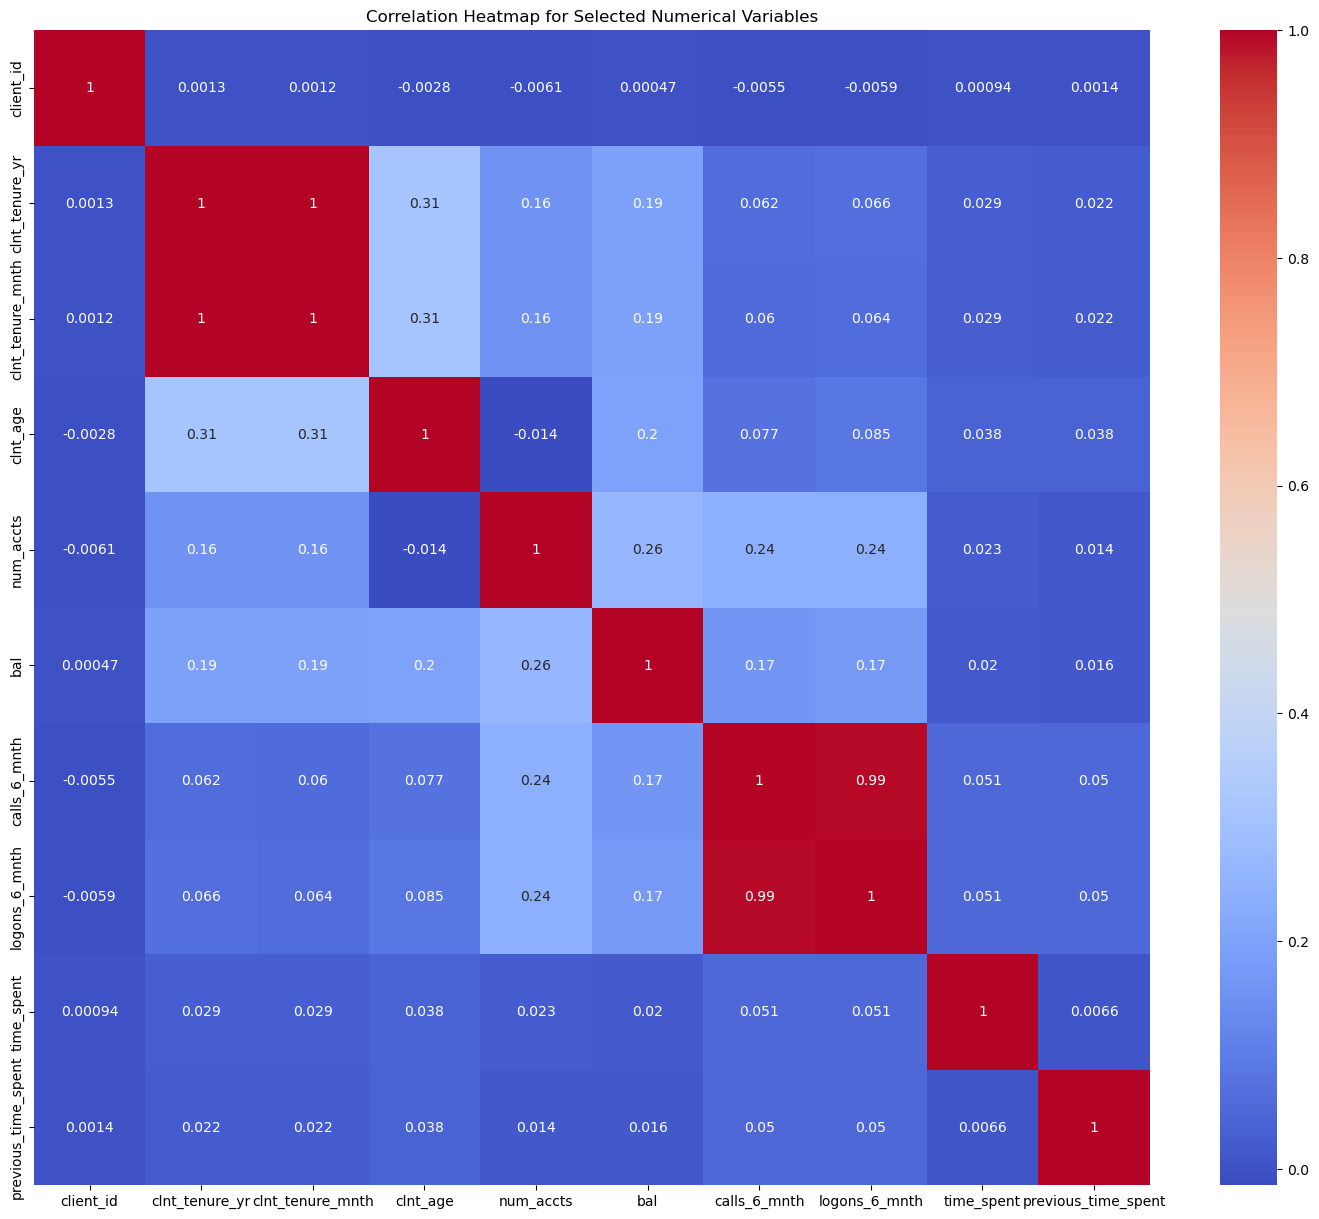

In [81]:
correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

In [90]:
# Calculate session duration
session_duration = df_final_filtered.groupby('visitor_id').agg(
    session_start=('date_time', 'min'),
    session_end=('date_time', 'max')
).reset_index()

# Calculate duration in seconds
session_duration['duration'] = (session_duration['session_end'] - session_duration['session_start']).dt.total_seconds()

# Merge back with original data to get variation
session_duration = session_duration.merge(df_final_filtered[['visitor_id', 'Variation', 'process_step', 'clnt_age_category', 'time_spent']], on='visitor_id', how='left').drop_duplicates()
session_duration.head()

,visitor_id,session_start,session_end,duration,Variation,process_step,clnt_age_category,time_spent
0,100019786_4272121951,2017-04-15 15:13:33,2017-04-15 15:16:47,194.0,Test,start,Middle-aged (41-50),0.0
1,100019786_4272121951,2017-04-15 15:13:33,2017-04-15 15:16:47,194.0,Test,step_1,Middle-aged (41-50),13.0
2,100019786_4272121951,2017-04-15 15:13:33,2017-04-15 15:16:47,194.0,Test,step_2,Middle-aged (41-50),35.0
3,100019786_4272121951,2017-04-15 15:13:33,2017-04-15 15:16:47,194.0,Test,step_3,Middle-aged (41-50),89.0
4,100019786_4272121951,2017-04-15 15:13:33,2017-04-15 15:16:47,194.0,Test,confirm,Middle-aged (41-50),28.0


In [89]:
df_final_filtered.head(2)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time,clnt_age_category,balance,time_spent,previous_time_spent
45124,6265388,7.0,94.0,42.5,U,4.0,214896.6,5.0,8,Test,100019786_4272121951,703380671_89376183829_330646,start,2017-04-15 15:13:33,Middle-aged (41-50),High,0.0,NaN
45125,6265388,7.0,94.0,42.5,U,4.0,214896.6,5.0,8,Test,100019786_4272121951,703380671_89376183829_330646,step_1,2017-04-15 15:13:46,Middle-aged (41-50),High,13.0,0.0


In [93]:


# Calculate KPIs by demographic segments
segmented_kpis = session_duration.groupby('clnt_age_category').agg(
    completion_rate=('process_step', lambda x: (x == 'confirm').sum() / len(x)),
    average_session_duration=('duration', 'mean'),
    average_time_spent=('time_spent', 'mean')  
).reset_index()

print(segmented_kpis)

      clnt_age_category  completion_rate  average_session_duration  \
0          Young (0-30)         0.139992             244307.018210   
1  Young Adults (31-40)         0.143571             265124.218795   
2   Middle-aged (41-50)         0.139691             335799.658545   
3          Senior (51+)         0.131231             559034.437194   

   average_time_spent  
0        27965.752420  
1        30902.531693  
2        36831.200281  
3        53383.631771  


C:\Users\eslab\AppData\Local\Temp\ipykernel_9316\3037342558.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmented_kpis = session_duration.groupby('clnt_age_category').agg(


C:\Users\eslab\AppData\Local\Temp\ipykernel_9316\2369748226.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segmented_kpis, x='clnt_age_category', y='completion_rate', palette='viridis')


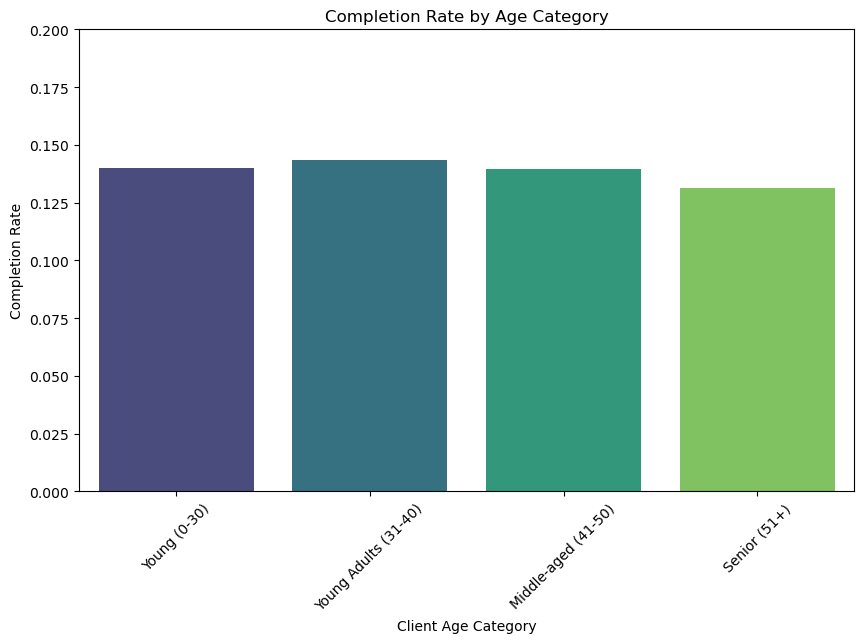

In [94]:
plt.figure(figsize=(10, 6))
sns.barplot(data=segmented_kpis, x='clnt_age_category', y='completion_rate', palette='viridis')
plt.title('Completion Rate by Age Category')
plt.xlabel('Client Age Category')
plt.ylabel('Completion Rate')
plt.ylim(0, 0.2)  # Assuming the rates are in percentage
plt.xticks(rotation=45)
plt.show()